In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
import seaborn as sns

<AxesSubplot: >

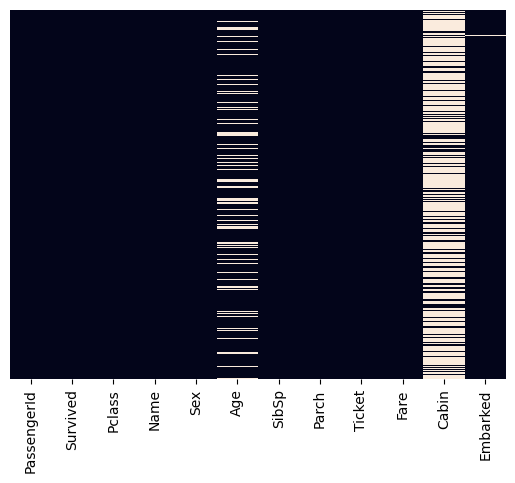

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

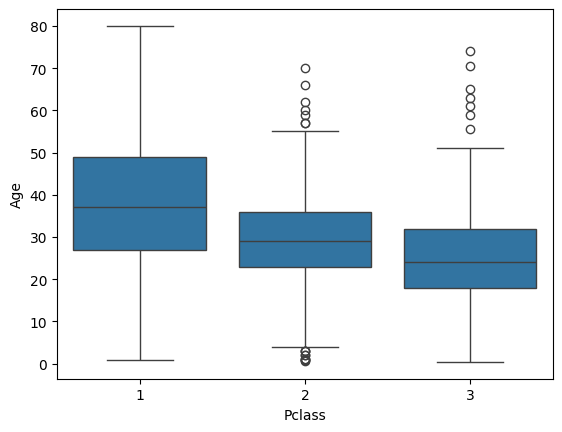

In [9]:
sns.boxplot(data=data,x='Pclass',y='Age')

In [12]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [13]:
data['Age']=data[['Age','Pclass']].apply(impute_age,axis=1)

In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data.drop(['Cabin'],axis=1,inplace=True)

In [16]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
data.dropna(inplace=True)

In [18]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot: >

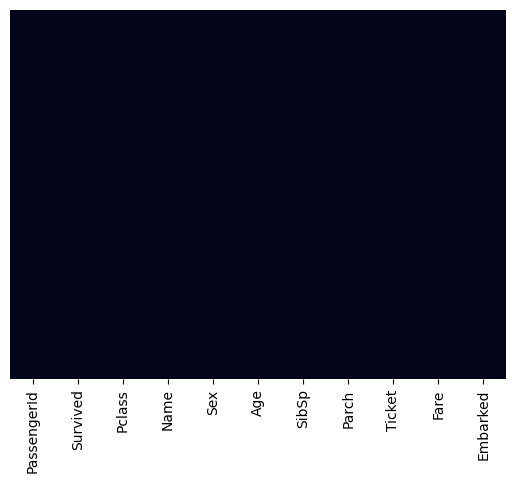

In [19]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [20]:
dat=pd.read_csv('housing.csv')

In [21]:
dat.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [22]:
dat.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot: >

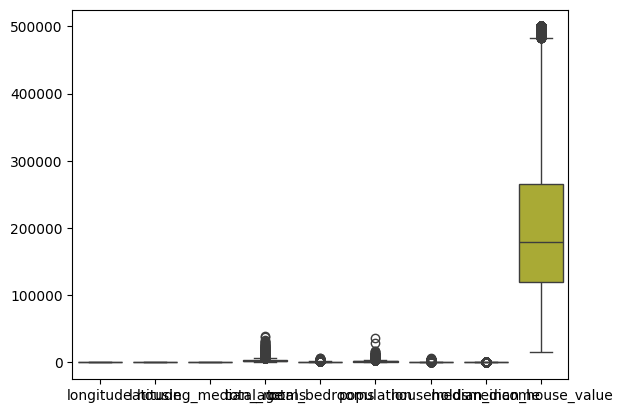

In [23]:
sns.boxplot(dat)

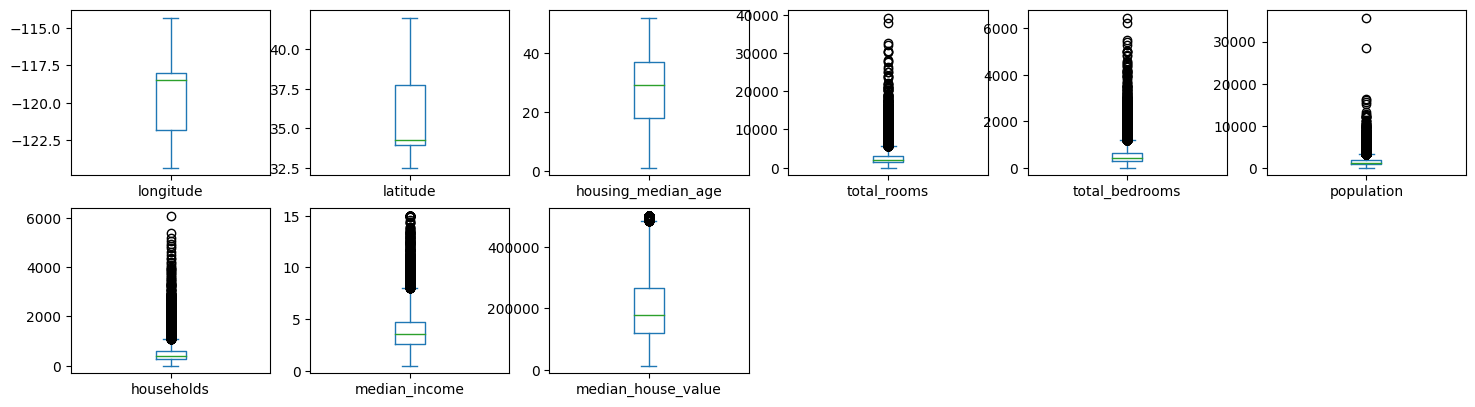

In [27]:
import matplotlib.pyplot as plt
dat.plot(kind='box',subplots=True,layout=(6,6),figsize=(18,15))
plt.show()

In [30]:
from sklearn.impute import SimpleImputer
import numpy as np

In [31]:
imput=SimpleImputer(missing_values=np.NaN,strategy='median')
dat['total_bedrooms']=imput.fit_transform(dat['total_bedrooms'].values.reshape(-1,1))
dat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [32]:
dat.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [42]:
datas=pd.read_csv('Data.csv')

In [43]:
datas

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [52]:
datas.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

In [45]:
datas.shape

(10, 4)

In [46]:
from sklearn.impute import SimpleImputer

In [47]:
imp=SimpleImputer(missing_values=np.NaN,strategy='median')
datas['Salary']=imp.fit_transform(datas['Salary'].values.reshape(-1,1))
datas

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,61000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [51]:
datas['Age'].ffill(inplace=True)

print(datas['Age'])

0    44.0
1    27.0
2    30.0
3    38.0
4    40.0
5    35.0
6    35.0
7    48.0
8    50.0
9    37.0
Name: Age, dtype: float64


In [ ]:
# imp=SimpleImputer(missing_values=np.NaN,strategy='median')
# datas['Age']=imp.fit_transform(datas['Age'].values.reshape(-1,1))
# datas

In [53]:
da=pd.read_csv('Data.csv')

In [57]:
da

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


<AxesSubplot: xlabel='Age', ylabel='Salary'>

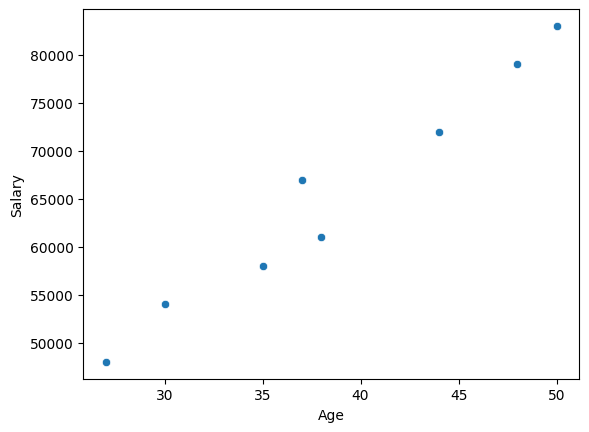

In [56]:
sns.scatterplot(data=da,x='Age',y='Salary')

<AxesSubplot: xlabel='Age', ylabel='Salary'>

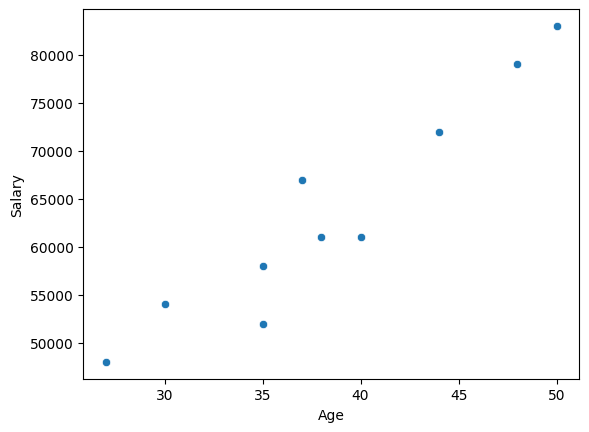

In [58]:
sns.scatterplot(data=datas,x='Age',y='Salary')

In [62]:
da.drop(['Country','Purchased'],axis=1,inplace=True)

In [63]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()

# Fit and transform the data
df_imputed = pd.DataFrame(imputer.fit_transform(da), columns=da.columns)

print(df_imputed)

         Age        Salary
0  44.000000  72000.000000
1  27.000000  48000.000000
2  30.000000  54000.000000
3  38.000000  61000.000000
4  40.000000  67211.832591
5  35.000000  58000.000000
6  29.903953  52000.000000
7  48.000000  79000.000000
8  50.000000  83000.000000
9  37.000000  67000.000000


<AxesSubplot: xlabel='Age', ylabel='Salary'>

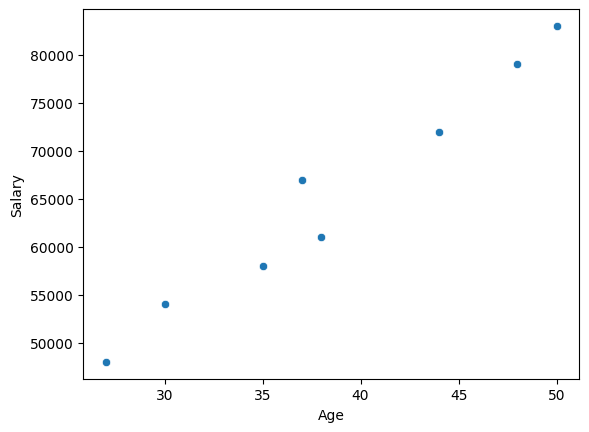

In [64]:
sns.scatterplot(data=da,x='Age',y='Salary')

In [65]:
da.isnull().sum()

Age       1
Salary    1
dtype: int64

In [6]:
import pandas as pd 
df=pd.read_csv('titanic.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
onehot=OneHotEncoder()

In [39]:
df=pd.read_excel('enco.xlsx')

In [17]:
df.head()

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,Red,Hot
1,1,F,Y,Blue,Warm
2,2,F,N,Blue,Cold
3,3,F,N,Green,Warm
4,4,T,N,Red,Cold


In [19]:
enc=onehot.fit_transform(df[['nom_0']]).toarray()

In [20]:
print(enc)

[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [21]:
encodes=pd.DataFrame(enc)

In [22]:
encodes

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,1.0,0.0,0.0
9,0.0,0.0,1.0


In [24]:
df=pd.concat([df,encodes],axis=1)
df.head()

,id,bin_1,bin_2,nom_0,ord_2,0,1,2,0,1,2
0,0,F,N,Red,Hot,0.0,0.0,1.0,0.0,0.0,1.0
1,1,F,Y,Blue,Warm,1.0,0.0,0.0,1.0,0.0,0.0
2,2,F,N,Blue,Cold,1.0,0.0,0.0,1.0,0.0,0.0
3,3,F,N,Green,Warm,0.0,1.0,0.0,0.0,1.0,0.0
4,4,T,N,Red,Cold,0.0,0.0,1.0,0.0,0.0,1.0


In [25]:
df.head()

,id,bin_1,bin_2,nom_0,ord_2,0,1,2,0,1,2
0,0,F,N,Red,Hot,0.0,0.0,1.0,0.0,0.0,1.0
1,1,F,Y,Blue,Warm,1.0,0.0,0.0,1.0,0.0,0.0
2,2,F,N,Blue,Cold,1.0,0.0,0.0,1.0,0.0,0.0
3,3,F,N,Green,Warm,0.0,1.0,0.0,0.0,1.0,0.0
4,4,T,N,Red,Cold,0.0,0.0,1.0,0.0,0.0,1.0


In [30]:
ddf=pd.get_dummies(df['bin_1'])

In [32]:
df

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,Red,Hot
1,1,F,Y,Blue,Warm
2,2,F,N,Blue,Cold
3,3,F,N,Green,Warm
4,4,T,N,Red,Cold
5,5,T,N,Green,Hot
6,6,F,N,Red,Cold
7,7,F,N,Red,Cold
8,8,T,N,Blue,Warm
9,9,T,Y,Red,Hot


In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
df['ord_2']=le.fit_transform(df['ord_2'])

In [35]:
df

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,Red,1
1,1,F,Y,Blue,2
2,2,F,N,Blue,0
3,3,F,N,Green,2
4,4,T,N,Red,0
5,5,T,N,Green,1
6,6,F,N,Red,0
7,7,F,N,Red,0
8,8,T,N,Blue,2
9,9,T,Y,Red,1


##### Deviation Encoding or Sum Encoding.

In [40]:
df

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,Red,Hot
1,1,F,Y,Blue,Warm
2,2,F,N,Blue,Cold
3,3,F,N,Green,Warm
4,4,T,N,Red,Cold
5,5,T,N,Green,Hot
6,6,F,N,Red,Cold
7,7,F,N,Red,Cold
8,8,T,N,Blue,Warm
9,9,T,Y,Red,Hot


In [46]:
!pip install category_encoders

     ---------------------------------------- 81.9/81.9 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 233.9/233.9 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 9.8/9.8 MB 1.5 MB/s eta 0:00:00


In [48]:
import category_encoders as ce
import pandas as pd

# Correct the DataFrame
data = pd.DataFrame({'City': ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore', 'Delhi', 'Hyderabad']})

# Instantiate the SumEncoder
encoder = ce.sum_coding.SumEncoder(cols='City', verbose=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(data)

# Print the original and encoded data
print("Original Data:")
print(data)
print("\nEncoded Data:")
print(encoded_data)


Original Data:
        City
0      Delhi
1     Mumbai
2  Hyderabad
3    Chennai
4  Bangalore
5      Delhi
6  Hyderabad

Encoded Data:
   intercept  City_0  City_1  City_2  City_3
0          1     1.0     0.0     0.0     0.0
1          1     0.0     1.0     0.0     0.0
2          1     0.0     0.0     1.0     0.0
3          1     0.0     0.0     0.0     1.0
4          1    -1.0    -1.0    -1.0    -1.0
5          1     1.0     0.0     0.0     0.0
6          1     0.0     0.0     1.0     0.0


C:\Users\user\anaconda3\envs\tf-2\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
C:\Users\user\anaconda3\envs\tf-2\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


In [49]:
import category_encoders as ce
import pandas as pd

#Create the dataframe
data=pd.DataFrame({'Month':['January','April','March','April','Februay','June','July','June','September']})

#Create object for hash encoder
encoder=ce.HashingEncoder(cols='Month',n_components=6)

In [51]:
#Fit and Transform Data
encoder.fit_transform(data)

,col_0,col_1,col_2,col_3,col_4,col_5
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
5,0,1,0,0,0,0
6,1,0,0,0,0,0
7,0,1,0,0,0,0
8,0,0,0,0,1,0


##### Binary Encoding
Binary encoding is a combination of Hash encoding and one-hot encoding.

 In this encoding scheme,<br>
 the categorical feature is first converted into numerical using an ordinal encoder.<br>
 Then the numbers are transformed in the binary number.<br>
 After that binary value is split into different columns.

In [52]:
import category_encoders as ce
import pandas as pd

#Create the Dataframe
data=pd.DataFrame({'City':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi','Hyderabad','Mumbai','Agra']})

#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['city'],return_df=True)

#Original Data
data

,City
0,Delhi
1,Mumbai
2,Hyderabad
3,Chennai
4,Bangalore
5,Delhi
6,Hyderabad
7,Mumbai
8,Agra


#### Base N Encoding

In [56]:
import category_encoders as ce
import pandas as pd

#Create the dataframe
data=pd.DataFrame({'City':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi','Hyderabad','Mumbai','Agra']})

#Create an object for Base N Encoding
encoder= ce.BaseNEncoder(cols=['City'],return_df=True,base=5)

data_encoded=encoder.fit_transform(data)
data_encoded

,City_0,City_1
0,0,1
1,0,2
2,0,3
3,0,4
4,1,0
5,0,1
6,0,3
7,0,2
8,1,1


#### Target Encoding

Unlike one-hot encoding, which creates binary columns for each category, target encoding calculates and assigns a numerical value to each category based on the relationship between the category and the target variable.

n target encoding, we calculate the mean of the target variable for each category and replace the category variable with the mean value.

In [58]:
import pandas as pd
import category_encoders as ce

#Create the Dataframe
data=pd.DataFrame({'class':['A,','B','C','B','C','A','A','A'],'Marks':[50,30,70,80,45,97,80,68]})

#Create target encoding object
encoder=ce.TargetEncoder(cols='class') 

#Original Data
data

,class,Marks
0,"A,",50
1,B,30
2,C,70
3,B,80
4,C,45
5,A,97
6,A,80
7,A,68


In [59]:
#Fit and Transform Train Data
encoder.fit_transform(data['class'],data['Marks'])

,class
0,63.048373
1,63.581489
2,63.936117
3,63.581489
4,63.936117
5,67.574421
6,67.574421
7,67.574421


In [60]:
dat=pd.read_csv('loan.csv')

In [62]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB


In [64]:
dat.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [71]:

print(pd.Series.nunique(dat['Gender']))
print(pd.Series.nunique(dat['Married']))
print(pd.Series.nunique(dat['Dependents']))
print(pd.Series.nunique(dat['Self_Employed']))
print(pd.Series.nunique(dat['Credit_History']))
print(pd.Series.nunique(dat['Property_Area']))
print(pd.Series.nunique(dat['Loan_Status']))

2
2
4
2
2
3
2


In [89]:
ddf['Gender_1']=pd.get_dummies(dat['Gender'],drop_first=True)

In [92]:
ddp['Married_1']=pd.get_dummies(dat['Married'],drop_first=True)

dds['Self_emp']=pd.get_dummies(dat['Self_Employed'],drop_first=True)
ddl['loan_st']=pd.get_dummies(dat['Loan_Status'],drop_first=True)

In [90]:
df=pd.concat([dat,ddf],axis=1)

In [93]:
df=pd.concat([df,ddp],axis=1)

In [94]:
df=pd.concat([df,dds],axis=1)
df=pd.concat([df,ddl],axis=1)

In [85]:
from sklearn.preprocessing import OneHotEncoder

In [86]:
le=OneHotEncoder()


In [102]:
enc=le.fit_transform(df[['Property_Area']]).toarray()

encodes=pd.DataFrame(enc)
df=pd.concat([df,encodes],axis=1)

In [103]:
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,...,Property_Area,Loan_Status,Total_Income,Male,Married_1,Self_emp,loan_st,0,1,2
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,...,Urban,Y,$5849.0,1,0,0,1,0.0,0.0,1.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,...,Rural,N,$6091.0,1,1,0,0,1.0,0.0,0.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,...,Urban,Y,$3000.0,1,1,1,1,0.0,0.0,1.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,...,Urban,Y,$4941.0,1,1,0,1,0.0,0.0,1.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,...,Urban,Y,$6000.0,1,0,0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,...,Semiurban,Y,$4239.0,0,1,0,1,0.0,1.0,0.0
496,496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,...,Rural,Y,$4300.0,1,1,0,1,1.0,0.0,0.0
497,497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,...,Urban,Y,$7482.0,1,1,0,1,0.0,0.0,1.0
498,498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,...,Semiurban,Y,$2895.0,1,1,1,1,0.0,1.0,0.0


In [100]:
df.drop(['Gender_1'],axis=1,inplace=True)

In [101]:
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Male,Married_1,Self_emp,loan_st
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0,1,0,0,1
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0,1,1,0,0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0,1,1,1,1
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0,1,1,0,1
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,$4239.0,0,1,0,1
496,496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,$4300.0,1,1,0,1
497,497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y,$7482.0,1,1,0,1
498,498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,$2895.0,1,1,1,1


In [104]:
df.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
Male                  0
Married_1             0
Self_emp              0
loan_st               0
0                     0
1                     0
2                     0
dtype: int64

In [21]:
import pandas as pd
datas=pd.read_csv('loan.csv')

In [9]:
dat.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               0
Dependents            0
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term      0
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the 'married' column
dat['Married'] = imputer.fit_transform(dat[['Married']])



     Unnamed: 0   Loan_ID  Gender Married Dependents     Education  \
0             0  LP001002    Male      No          0      Graduate   
1             1  LP001003    Male     Yes          1      Graduate   
2             2  LP001005    Male     Yes          0      Graduate   
3             3  LP001006    Male     Yes          0  Not Graduate   
4             4  LP001008    Male      No          0      Graduate   
..          ...       ...     ...     ...        ...           ...   
495         495  LP002586  Female     Yes          1      Graduate   
496         496  LP002587    Male     Yes          0  Not Graduate   
497         497  LP002588    Male     Yes          0      Graduate   
498         498  LP002600    Male     Yes          1      Graduate   
499         499  LP002602    Male      No          0      Graduate   

    Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0              No             5849                0.0         NaN   
1              No    

In [11]:
dat.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term      0
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [18]:
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the 'married' column
dat['Gender'] = imputer.fit_transform(dat[['Gender']])


In [12]:
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the 'married' column
dat['LoanAmount'] = imputer.fit_transform(dat[['LoanAmount']])

In [19]:
dat.to_csv('loon.csv')

In [20]:
dat.isnull().sum()

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [23]:
datas.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [32]:
datas.head()


,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [26]:
import seaborn as sns

<AxesSubplot: ylabel='ApplicantIncome'>

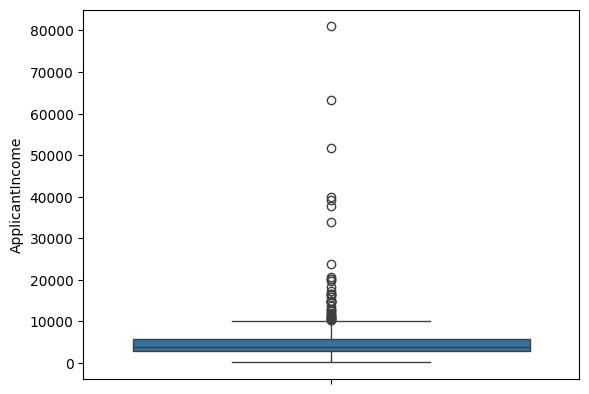

In [29]:
sns.boxplot(datas['ApplicantIncome'])